# Prism Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
consdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-consDF.pqt')
consdf.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET
0,0,2021-09-01,726.0,0.0
1,1,2021-07-01,626.0,0.0
2,2,2021-05-01,680.0,0.0
3,3,2021-03-01,734.0,0.0
4,4,2021-10-01,676.0,0.0


In [3]:
acctdf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-acctDF.pqt')
acctdf

,prism_consumer_id,prism_account_id,account_type,balance_date,balance
0,3023,0,SAVINGS,2021-08-31,90.57
1,3023,1,CHECKING,2021-08-31,225.95
2,4416,2,SAVINGS,2022-03-31,15157.17
3,4416,3,CHECKING,2022-03-31,66.42
4,4227,4,CHECKING,2021-07-31,7042.90
...,...,...,...,...,...
24461,11500,24461,CHECKING,2022-03-27,732.75
24462,11615,24462,SAVINGS,2022-03-30,5.00
24463,11615,24463,CHECKING,2022-03-30,1956.46
24464,12210,24464,CHECKING,2022-03-28,2701.51


In [4]:
trxndf = pd.read_parquet('/uss/hdsi-prismdata/q2-ucsd-trxnDF.pqt')
trxndf

,prism_consumer_id,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,3023,0,4,0.05,CREDIT,2021-04-16
1,3023,1,12,481.56,CREDIT,2021-04-30
2,3023,2,4,0.05,CREDIT,2021-05-16
3,3023,3,4,0.07,CREDIT,2021-06-16
4,3023,4,4,0.06,CREDIT,2021-07-16
...,...,...,...,...,...,...
6407316,10533,6405304,31,4.96,DEBIT,2022-03-11
6407317,10533,6405305,12,63.48,DEBIT,2022-03-30
6407318,10533,6405306,12,53.99,DEBIT,2022-03-30
6407319,10533,6405307,12,175.98,DEBIT,2022-03-31


In [5]:
# columns I will need: credit/debit, amount, posted date, evaluation date, prism consumer id, DQ_TARGET
merged = pd.merge(consdf, trxndf, on='prism_consumer_id', how='left')
merged.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,prism_transaction_id,category,amount,credit_or_debit,posted_date
0,0,2021-09-01,726.0,0.0,136696,4.0,0.09,CREDIT,2021-03-19
1,0,2021-09-01,726.0,0.0,136697,4.0,0.05,CREDIT,2021-04-16
2,0,2021-09-01,726.0,0.0,136698,4.0,0.06,CREDIT,2021-05-21
3,0,2021-09-01,726.0,0.0,136699,4.0,0.04,CREDIT,2021-06-18
4,0,2021-09-01,726.0,0.0,136700,4.0,0.02,CREDIT,2021-07-16


In [6]:
merged = merged[merged['posted_date'] <= merged['evaluation_date']]
credit_only = merged[merged['credit_or_debit'] == 'CREDIT'].copy()
credit_only['posted_date'] = pd.to_datetime(credit_only['posted_date'])
credit_only['Year-Month'] = credit_only['posted_date'].dt.to_period('M')
credit_only

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,prism_transaction_id,category,amount,credit_or_debit,posted_date,Year-Month
0,0,2021-09-01,726.0,0.0,136696,4.0,0.09,CREDIT,2021-03-19,2021-03
1,0,2021-09-01,726.0,0.0,136697,4.0,0.05,CREDIT,2021-04-16,2021-04
2,0,2021-09-01,726.0,0.0,136698,4.0,0.06,CREDIT,2021-05-21,2021-05
3,0,2021-09-01,726.0,0.0,136699,4.0,0.04,CREDIT,2021-06-18,2021-06
4,0,2021-09-01,726.0,0.0,136700,4.0,0.02,CREDIT,2021-07-16,2021-07
...,...,...,...,...,...,...,...,...,...,...
6407626,14999,2022-02-12,751.0,NaN,3843006,2.0,2000.00,CREDIT,2022-01-18,2022-01
6407627,14999,2022-02-12,751.0,NaN,3843007,45.0,860.29,CREDIT,2022-01-18,2022-01
6407628,14999,2022-02-12,751.0,NaN,3843008,3.0,589.73,CREDIT,2022-01-21,2022-01
6407629,14999,2022-02-12,751.0,NaN,3843009,3.0,589.70,CREDIT,2022-02-04,2022-02


In [7]:
monthly_inflow = credit_only.groupby(['prism_consumer_id', 'Year-Month'])['amount'].sum().reset_index(name='monthly_inflow')
monthly_inflow

,prism_consumer_id,Year-Month,monthly_inflow
0,0,2021-03,2400.69
1,0,2021-04,3210.66
2,0,2021-05,967.00
3,0,2021-06,1068.13
4,0,2021-07,2204.83
...,...,...,...
81677,9998,2023-10,5140.21
81678,9999,2023-05,7664.45
81679,9999,2023-06,12576.78
81680,9999,2023-07,10370.51


In [8]:
consdf['Evaluation Month'] = consdf['evaluation_date'].dt.to_period('M')
consdf

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month
0,0,2021-09-01,726.0,0.0,2021-09
1,1,2021-07-01,626.0,0.0,2021-07
2,2,2021-05-01,680.0,0.0,2021-05
3,3,2021-03-01,734.0,0.0,2021-03
4,4,2021-10-01,676.0,0.0,2021-10
...,...,...,...,...,...
14995,14995,2022-03-08,655.0,NaN,2022-03
14996,14996,2022-01-15,625.0,NaN,2022-01
14997,14997,2022-01-31,688.0,NaN,2022-01
14998,14998,2022-03-08,722.0,NaN,2022-03


In [9]:
with_eval_month = pd.merge(consdf, monthly_inflow, on='prism_consumer_id', how='left')
with_eval_month

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83
...,...,...,...,...,...,...,...
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05
83000,14999,2022-02-12,751.0,NaN,2022-02,2022-01,4078.80


In [10]:
with_eval_month['months_diff'] = (
    (with_eval_month['Evaluation Month'].dt.year - with_eval_month['Year-Month'].dt.year) * 12 +
    (with_eval_month['Evaluation Month'].dt.month - with_eval_month['Year-Month'].dt.month)
)

with_eval_month

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow,months_diff
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69,6
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66,5
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00,4
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13,3
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83,2
...,...,...,...,...,...,...,...,...
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10,4
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17,3
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05,2
83000,14999,2022-02-12,751.0,NaN,2022-02,2022-01,4078.80,1


In [11]:
last_year = with_eval_month[(with_eval_month['months_diff'] >= 1) & (with_eval_month['months_diff'] <= 12)]
last_year

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,Year-Month,monthly_inflow,months_diff
0,0,2021-09-01,726.0,0.0,2021-09,2021-03,2400.69,6
1,0,2021-09-01,726.0,0.0,2021-09,2021-04,3210.66,5
2,0,2021-09-01,726.0,0.0,2021-09,2021-05,967.00,4
3,0,2021-09-01,726.0,0.0,2021-09,2021-06,1068.13,3
4,0,2021-09-01,726.0,0.0,2021-09,2021-07,2204.83,2
...,...,...,...,...,...,...,...,...
82996,14999,2022-02-12,751.0,NaN,2022-02,2021-09,1206.47,5
82997,14999,2022-02-12,751.0,NaN,2022-02,2021-10,1672.10,4
82998,14999,2022-02-12,751.0,NaN,2022-02,2021-11,1876.17,3
82999,14999,2022-02-12,751.0,NaN,2022-02,2021-12,2283.05,2


In [12]:
# average monthly inflow per consumer over the last 3 months
sum_yearly_inflow = last_year.groupby('prism_consumer_id')['monthly_inflow'].sum().reset_index(name='avg_yearly_inflow')
sum_yearly_inflow

,prism_consumer_id,avg_yearly_inflow
0,0,12616.52
1,1,22183.66
2,10,18250.62
3,10000,74291.49
4,10001,61026.34
...,...,...
13616,9995,16925.84
13617,9996,1000.03
13618,9997,12743.23
13619,9998,14566.37


In [43]:
# variability in income (higher variability = more likely to be delinquent)
year_std = last_year.groupby('prism_consumer_id')['monthly_inflow'].std().reset_index()
year_std.columns = ['prism_consumer_id', 'std_inflow']

In [44]:
# Trend: Is income increasing or decreasing?
def calculate_trend(group):
    if len(group) < 2:
        return 0
    months = group['months_diff'].values
    inflows = group['monthly_inflow'].values
    return np.polyfit(months, inflows, 1)[0]  # slope

trend = last_year.groupby('prism_consumer_id').apply(calculate_trend, include_groups=False).reset_index()
trend.columns = ['prism_consumer_id', 'trend']

In [45]:
# number of transactions
num_transactions = last_year.groupby('prism_consumer_id').size().reset_index()
num_transactions.columns = ['prism_consumer_id', 'num_transactions']

### Evaluating Model

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [48]:
df_eval = pd.merge(consdf, sum_yearly_inflow, on='prism_consumer_id', how='inner')
df_eval = pd.merge(df_eval, year_std, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, trend, on='prism_consumer_id', how='left')
df_eval = pd.merge(df_eval, num_transactions, on='prism_consumer_id', how='left')
df_eval

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,Evaluation Month,avg_yearly_inflow,std_inflow,trend,num_transactions
0,0,2021-09-01,726.0,0.0,2021-09,12616.52,908.391215,31.250286,6
1,1,2021-07-01,626.0,0.0,2021-07,22183.66,1525.566140,-415.096571,6
2,2,2021-05-01,680.0,0.0,2021-05,22552.71,3171.402778,-463.708286,6
3,3,2021-03-01,734.0,0.0,2021-03,19201.43,4228.545848,-1503.769429,6
4,4,2021-10-01,676.0,0.0,2021-10,11501.05,1397.342044,-498.965299,5
...,...,...,...,...,...,...,...,...,...
13616,14995,2022-03-08,655.0,NaN,2022-03,11637.81,1754.643462,-789.170000,6
13617,14996,2022-01-15,625.0,NaN,2022-01,60228.23,6788.642248,-1068.350833,8
13618,14997,2022-01-31,688.0,NaN,2022-01,41131.47,7925.862203,-2249.331786,7
13619,14998,2022-03-08,722.0,NaN,2022-03,170516.97,25188.969103,5275.246310,8


In [49]:
# If higher inflow means lower delinquency, invert the feature
df_eval = df_eval.dropna(subset=['DQ_TARGET', 'avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions'])
features = df_eval[['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions']]
y_true = df_eval['DQ_TARGET']

# Train the model:
X_train, X_test, y_train, y_test = train_test_split(features, y_true, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
print(f"Random Forest AUC: {auc:.3f}")

# Also check feature importance:
feature_names = ['avg_yearly_inflow', 'std_inflow', 'trend', 'num_transactions']
importances = rf.feature_importances_
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

Random Forest AUC: 0.681
avg_yearly_inflow: 0.321
std_inflow: 0.306
trend: 0.305
num_transactions: 0.067


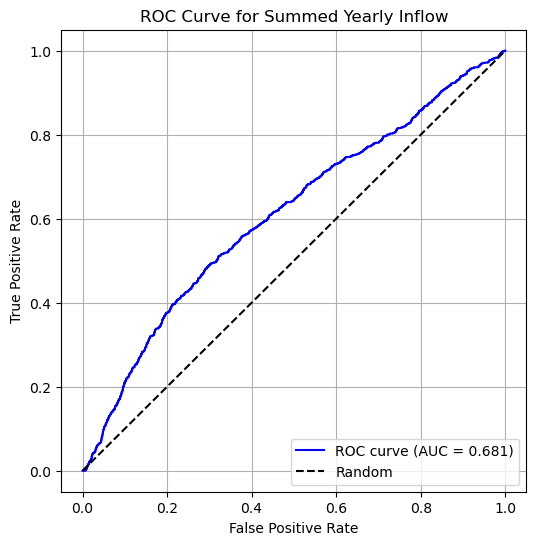

In [50]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})', color='blue')
plt.plot([0,1], [0,1], 'k--', label='Random')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Summed Yearly Inflow')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
